# Final Project

**Deadline:** 23.01.2023

💚**Anna Tigranyan**<br>
💜**Anna Marukhyan**<br>
💛**Genya Hakobyan**<br>

## Importing Libraries

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snsa

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances

In [4]:
df = pd.read_csv('original_data.csv')

## Data Discription

* **userName**: the name of the applicant
* **major**: the applicant's undergraduate major
* **researchExp**: the number of years of research experience the applicant has
* **industryExp**: the number of years of industry experience the applicant has
* **specialization**: the applicant's area of specialization (if any)
* **toeflScore**: the applicant's score on the Test of English as a Foreign Language (TOEFL)
* **program**: the graduate program the applicant is applying to
* **department**: the department of the graduate program the applicant is applying to
* **toeflEssay**: the applicant's essay score on the TOEFL
* **internExp**: the number of internships the applicant has had
* **greV**: the applicant's Verbal Reasoning score on the Graduate Record Examination (GRE)
* **greQ**: the applicant's Quantitative Reasoning score on the GRE
* **userProfileLink**: a link to the applicant's online profile (if any)
* **journalPubs**: the number of journal publications the applicant has
* **greA**: the applicant's Analytical Writing score on the GRE
* **topperCgpa**: the applicant's highest undergraduate GPA
* **termAndYear**: the term and year the applicant is applying for
* **confPubs**: the number of conference publications the applicant has
* **ugCollege**: the applicant's undergraduate college or university
* **gmatA**: the applicant's Analytical Writing score on the Graduate Management Admission Test (GMAT)
* **cgpa**: the applicant's undergraduate GPA
* **gmatQ**: the applicant's Quantitative score on the GMAT
* **cgpaScale**: the scale used for the applicant's undergraduate GPA
* **gmatV**: the applicant's Verbal score on the GMAT
* **univName**: the name of the university the applicant is applying to
* **admit**: whether the applicant was admitted (1) or not (0)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53644 entries, 0 to 53643
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userName         53644 non-null  object 
 1   major            53257 non-null  object 
 2   researchExp      53644 non-null  int64  
 3   industryExp      53644 non-null  int64  
 4   specialization   31949 non-null  object 
 5   toeflScore       49230 non-null  float64
 6   program          53322 non-null  object 
 7   department       53643 non-null  object 
 8   toeflEssay       11874 non-null  object 
 9   internExp        53630 non-null  float64
 10  greV             52388 non-null  float64
 11  greQ             52424 non-null  float64
 12  userProfileLink  53644 non-null  object 
 13  journalPubs      53322 non-null  object 
 14  greA             50786 non-null  float64
 15  topperCgpa       53641 non-null  float64
 16  termAndYear      53322 non-null  object 
 17  confPubs    

In [8]:
df.shape

(53644, 26)

In [4]:
df['userName'].nunique()

14798

In [5]:
df['univName'].nunique()

54

In [9]:
# df.isna().sum()

## Popularity-based Recommendation:
<br>
A simple recommendation system that recommends the items that are popular among all the users. In this case, we can recommend the universities that have the highest number of applicants.

In [13]:
# Group the data by university name and count the number of applicants per university
top_uni = df.groupby("univName")["userName"].count().reset_index(name="applicant_count")
top_uni = top_uni.sort_values(by="applicant_count", ascending=False)
top_10 = top_uni[:9]

In [14]:
top_10

,univName,applicant_count
13,North Carolina State University,3413
47,University of Texas Dallas,3402
0,Arizona State University,3176
20,SUNY Buffalo,2329
34,University of Florida,2318
24,Texas A and M University College Station,2181
14,Northeastern University,2019
44,University of Southern California,1960
7,Georgia Institute of Technology,1958


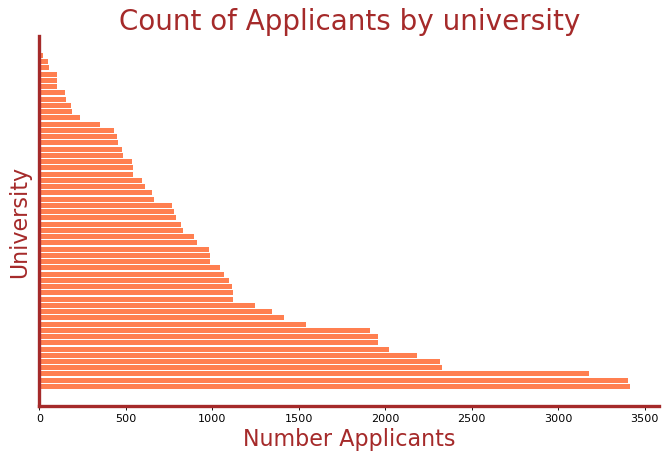

In [15]:
fig, ax = plt.subplots(figsize=(10,6),dpi=80)
ax.barh(top_uni['univName'], top_uni['applicant_count'], color = 'coral');
    
#labels & title
ax.set_title('Count of Applicants by university',fontsize = 25, color = 'brown')
ax.set_ylabel('University',color ='brown',size = "20")
ax.set_xlabel('Number Applicants',color ='brown',size = "20") 
plt.yticks([])
# #ax design
# ax.set_yticks(top_uni['univName'],fontsize=2)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(3)
    ax.spines[axis].set_color("brown")
for axi in ['top','right']:  
    ax.spines[axi].set_color(None)

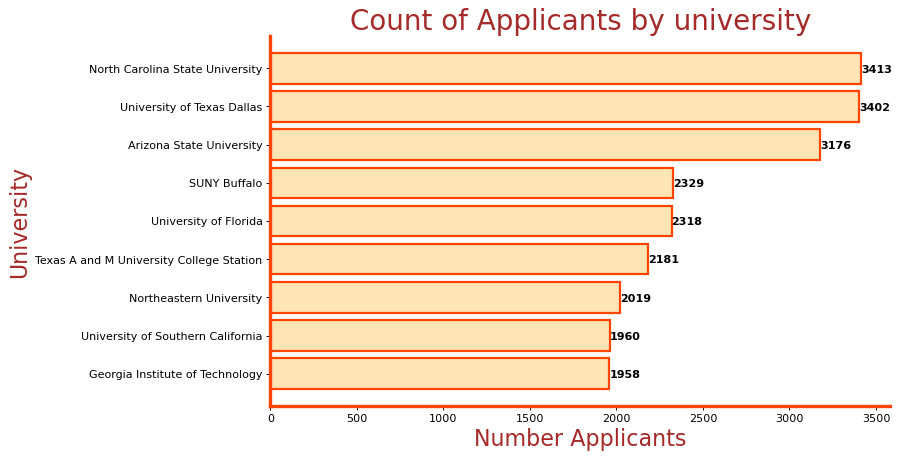

In [16]:
fig, ax = plt.subplots(figsize=(10,6),dpi=80)
ax.barh(top_10['univName'], top_10['applicant_count'], color = 'moccasin',edgecolor='orangered',linewidth=2);

# Show top values
ax.invert_yaxis()

# Adding annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='black')
    
#labels & title
ax.set_title('Count of Applicants by university',fontsize = 25, color = 'brown')
ax.set_ylabel('University',color ='brown',size = "20")
ax.set_xlabel('Number Applicants',color ='brown',size = "20") 

#ax design
ax.set_yticks(top_10['univName'])
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(3)
    ax.spines[axis].set_color("orangered")
for axi in ['top','right']:  
    ax.spines[axi].set_color(None)

We have obtained the most popular universities based on the number of applicants. In the simplest case, we can recommend an applicant to apply to one of the universities in the top 3 list.

In [23]:
top_10['univName']

13             North Carolina State University
47                  University of Texas Dallas
0                     Arizona State University
20                                SUNY Buffalo
34                       University of Florida
24    Texas A and M University College Station
14                     Northeastern University
44           University of Southern California
7              Georgia Institute of Technology
Name: univName, dtype: object

In [24]:
print(f'Top 3 popular univercitys are:\n \n{top_10[0:3]}')

Top 3 popular univercitys are:
 
                           univName  applicant_count
13  North Carolina State University             3413
47       University of Texas Dallas             3402
0          Arizona State University             3176


In [33]:
admit_df = df[df['admit']==1]


# Group the data by university name and count the number of applicants per university
top_uni_ad = admit_df.groupby("univName")["userName"].count().reset_index(name="applicant_count")
top_uni_ad = top_uni_ad.sort_values(by="applicant_count", ascending=False)
top_uni_ad_10 = top_uni_ad[:9]


In [43]:
rej_df = df[df['admit']==0]

top_uni_rej = rej_df.groupby("univName")["userName"].count().reset_index(name="applicant_count")
top_uni_rej = top_uni_rej.sort_values(by="applicant_count", ascending=False)
top_uni_rej_10 = top_uni_rej[:9]

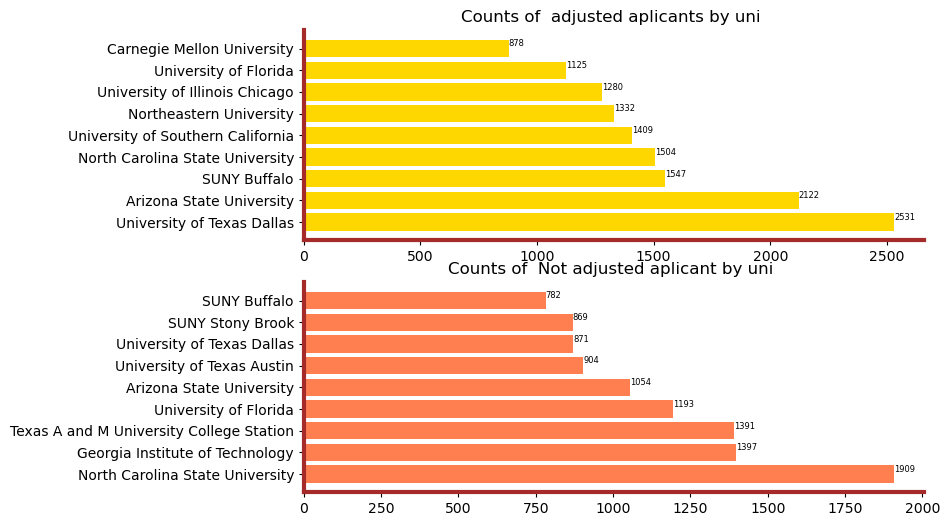

In [60]:
     
fig, ax = plt.subplot_mosaic([['upleft'],
                               ['lowleft']],
                               figsize=(8,6),dpi=100)

#plots
ax['upleft'].barh(top_uni_ad_10['univName'], top_uni_ad_10['applicant_count'], color = 'gold')

ax['lowleft'].barh(top_uni_rej_10['univName'], top_uni_rej_10['applicant_count'], color = 'coral')

# Adding annotation to bars
for a in ax['upleft'].patches:
    ax['upleft'].text(a.get_width()+0.2, a.get_y()+0.5,
         str(round((a.get_width()), 2)),
             fontsize = 6,color ='black')
    
for b in ax['lowleft'].patches:
     ax['lowleft'].text(b.get_width()+0.2, b.get_y()+0.5,
          str(round((b.get_width()), 2)),
             fontsize = 6,color ='black') 
        
# # titles and lebels
ax['upleft'].set_title(f'Counts of  adjusted aplicants by uni ',fontsize = 12, color = 'black')
ax['lowleft'].set_title(f'Counts of  Not adjusted aplicant by uni ',fontsize = 12, color = 'black')

#ax design
for axis in ['bottom','left']:
    ax['upleft'].spines[axis].set_linewidth(3)
    ax['lowleft'].spines[axis].set_linewidth(3)
    ax['upleft'].spines[axis].set_color("brown")
    ax['lowleft'].spines[axis].set_color("brown")
    
for axi in ['top','right']:  
    ax['upleft'].spines[axi].set_color(None)
    ax['lowleft'].spines[axi].set_color(None)


In [82]:
print(f'Top 3 popular univercitys are:\n \n{top_10[0:3]}')

Top 3 popular univercitys are:
 
                           univName  applicant_count
13  North Carolina State University             3413
47       University of Texas Dallas             3402
0          Arizona State University             3176


In [83]:
print(f'Top 3 popular univercitys(users addjusted) are:\n \n{top_uni_ad_10[0:3]}')

Top 3 popular univercitys(users addjusted) are:
 
                      univName  applicant_count
47  University of Texas Dallas             2531
0     Arizona State University             2122
20                SUNY Buffalo             1547


-----------------------------------

## **Collaborative Filtering**
A recommendation system that uses the past behavior and preferences of similar users to recommend items. In this case, we can use the **major, researchExp, industryExp, specialization, and program** of the applicant to find similar applicants and recommend universities they have applied to.<br>

* major: the applicant's undergraduate major
* researchExp: the number of years of research experience the applicant has
* industryExp: the number of years of industry experience the applicant has
* specialization: the applicant's area of specialization (if any)
* program: the graduate program the applicant is applying to

Let's move on and before constructing a collaborative recommendation for the applicant, let's take a look at the variables we have chosen by visualizing them.

In [61]:
# Group the data by major  and count the number of applicants per major
maj = df.groupby("major")["userName"].count().reset_index(name="applicant_count")
maj = maj.sort_values(by="applicant_count", ascending=False)
maj_10 = maj[:9]

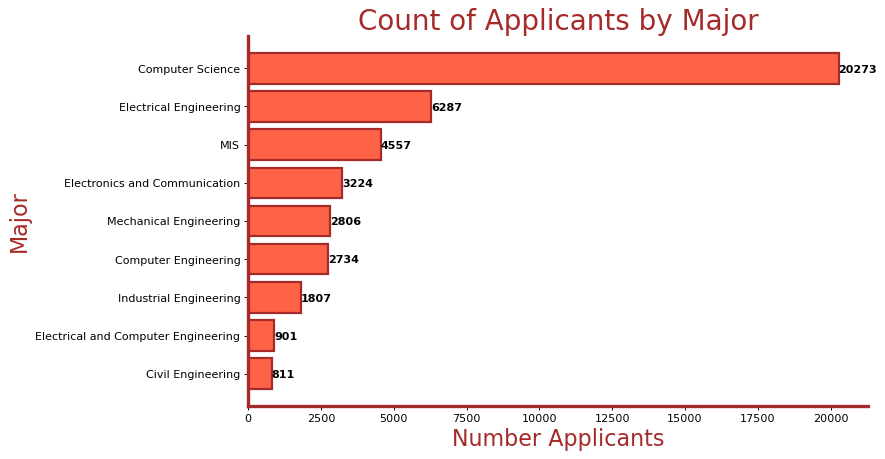

In [62]:
fig, ax = plt.subplots(figsize=(10,6),dpi=80)
ax.barh(maj_10['major'], maj_10['applicant_count'], color = 'tomato',edgecolor='brown',linewidth=2);

# Show top values
ax.invert_yaxis()

# Adding annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='black')
    
#labels & title
ax.set_title('Count of Applicants by Major',fontsize = 25, color = 'brown')
ax.set_ylabel('Major',color ='brown',size = "20")
ax.set_xlabel('Number Applicants',color ='brown',size = "20") 

#ax design
ax.set_yticks(maj_10['major'])
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(3)
    ax.spines[axis].set_color("brown")
for axi in ['top','right']:  
    ax.spines[axi].set_color(None)

 From the above visualizations, we can see that the majority of the applicants have a major in **Computer Science.**

In [63]:
# Groupping the data by reserch Experiance  and counting the number of applicants per experiance duration
r_exp = df.groupby("researchExp")["userName"].count().reset_index(name="applicant_count")
r_exp = r_exp.sort_values(by="applicant_count", ascending=False)
r_exp_10 = r_exp[:9]


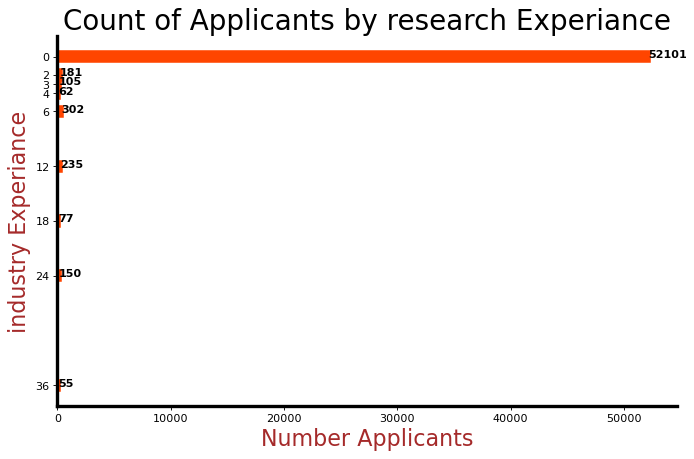

In [64]:
fig, ax = plt.subplots(figsize=(10,6),dpi=80)
ax.barh(r_exp_10['researchExp'], r_exp_10['applicant_count'], color = 'orangered',edgecolor='orangered',linewidth=5);

# Show top values
ax.invert_yaxis()

# Adding annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='black')
    
#labels & title
ax.set_title('Count of Applicants by research Experiance',fontsize = 25, color = 'black')
ax.set_ylabel('industry Experiance',color ='brown',size = "20")
ax.set_xlabel('Number Applicants',color ='brown',size = "20") 

#ax design
ax.set_yticks(r_exp_10['researchExp'])
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(3)
    ax.spines[axis].set_color("black")
for axi in ['top','right']:  
    ax.spines[axi].set_color(None)

In [65]:
# Groupping the data by reserch Experiance  and counting the number of applicants per experiance duration
ind_exp = df.groupby("industryExp")["userName"].count().reset_index(name="applicant_count")
ind_exp = ind_exp.sort_values(by="applicant_count", ascending=False)
ind_exp_10 = ind_exp[:9]


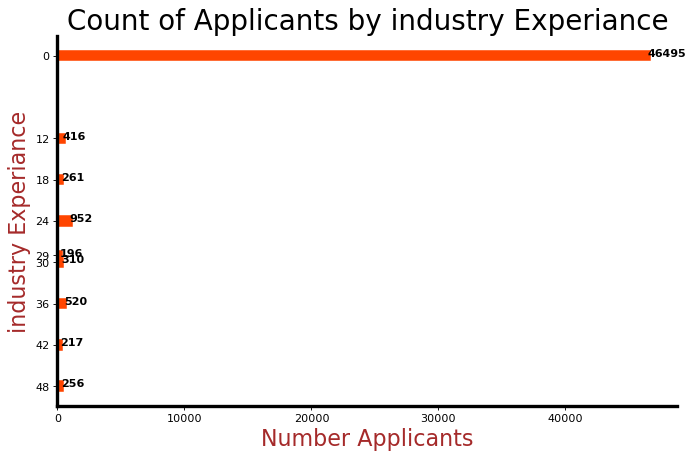

In [66]:
fig, ax = plt.subplots(figsize=(10,6),dpi=80)
ax.barh(ind_exp_10['industryExp'], ind_exp_10['applicant_count'], color = 'orangered',edgecolor='orangered',linewidth=5);

# Show top values
ax.invert_yaxis()

# Adding annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='black')
    
#labels & title
ax.set_title('Count of Applicants by industry Experiance',fontsize = 25, color = 'black')
ax.set_ylabel('industry Experiance',color ='brown',size = "20")
ax.set_xlabel('Number Applicants',color ='brown',size = "20") 

#ax design
ax.set_yticks(ind_exp_10['industryExp'])
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(3)
    ax.spines[axis].set_color("black")
for axi in ['top','right']:  
    ax.spines[axi].set_color(None)

In [67]:
# Groupping the data by reserch specialization  and counting the number of applicants per specialization
sp = df.groupby("specialization")["userName"].count().reset_index(name="applicant_count")
sp = sp.sort_values(by="applicant_count", ascending=False)
sp_10 = sp[:9]

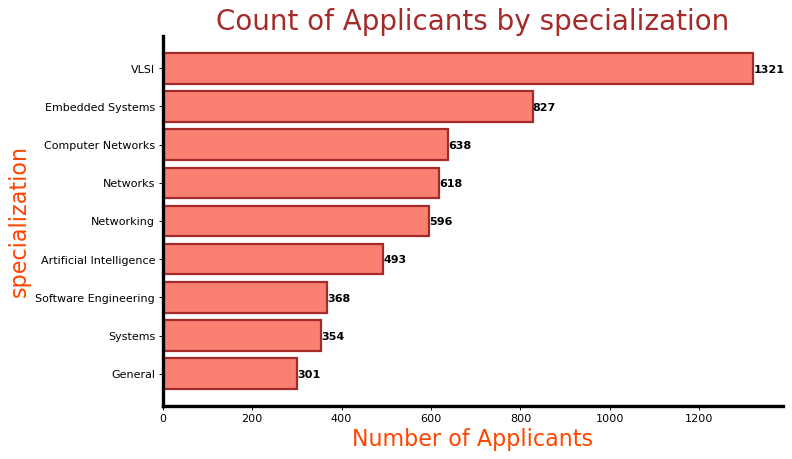

In [68]:
fig, ax = plt.subplots(figsize=(10,6),dpi=80)
ax.barh(sp_10['specialization'], sp_10['applicant_count'], color = 'salmon',edgecolor='brown',linewidth=2);

# Show top values
ax.invert_yaxis()

# Adding annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='black')
    
#labels & title
ax.set_title('Count of Applicants by specialization',fontsize = 25, color = 'brown')
ax.set_ylabel('specialization',color ='orangered',size = "20")
ax.set_xlabel('Number of Applicants',color ='orangered',size = "20") 

#ax design
ax.set_yticks(sp_10['specialization'])
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(3)
    ax.spines[axis].set_color("black")
for axi in ['top','right']:  
    ax.spines[axi].set_color(None)

VLSI stands for Very-Large-Scale Integration. It is a field of study and practice that deals with the design and manufacture of integrated circuits (ICs) that contain a very large number of transistors and other components. VLSI technology is responsible for many of the modern devices we use today, including smartphones, computers, and televisions. It is a highly interdisciplinary field that draws on knowledge from electrical engineering, computer science, physics, chemistry, and materials science.

In [69]:
# Group the data by major  and count the number of applicants per major
prog = df.groupby("program")["userName"].count().reset_index(name="applicant_count")
prog = prog.sort_values(by="applicant_count", ascending=False)

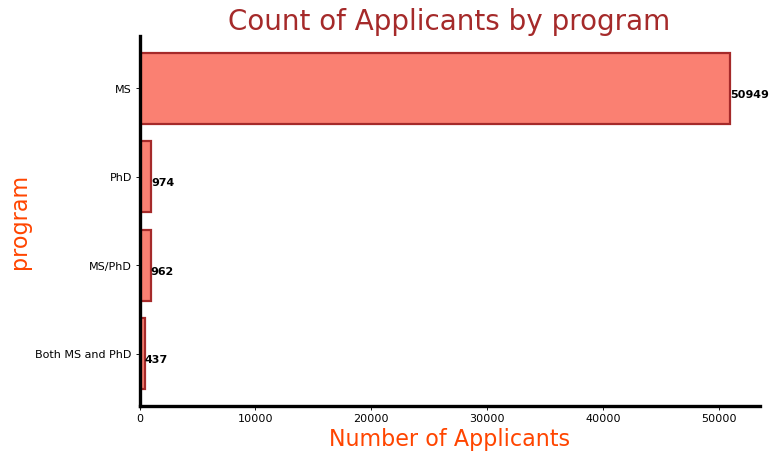

In [70]:
fig, ax = plt.subplots(figsize=(10,6),dpi=80)
ax.barh(prog['program'], prog['applicant_count'], color = 'salmon',edgecolor='brown',linewidth=2);

# Show top values
ax.invert_yaxis()

# Adding annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='black')
    
#labels & title
ax.set_title('Count of Applicants by program',fontsize = 25, color = 'brown')
ax.set_ylabel('program',color ='orangered',size = "20")
ax.set_xlabel('Number of Applicants',color ='orangered',size = "20") 

#ax design
ax.set_yticks(prog['program'])
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(3)
    ax.spines[axis].set_color("black")
for axi in ['top','right']:  
    ax.spines[axi].set_color(None)

-----------------------------------------------

In [74]:
# Selecting the columns used for finding similar applicants
df_cf = df[['major', 'researchExp', 'industryExp', 'specialization', 'program']]

# Creating dummies for categorical columns
df_cf = pd.get_dummies(df_cf, columns=['major', 'specialization', 'program'])

# Filling missing values with 0
df_cf.fillna(0, inplace=True)

# Finding cosine similarity between applicants
cosine_sim = cosine_similarity(df_cf)

# Creating a mapping of applicant index to their unique identifier (userName)
index_to_userName = {index: userName for index, userName in enumerate(df['userName'])}

In [75]:
# Defining a function to get top n similar applicants for a given applicant
def get_similar_applicants(userName, top_n=10):
    # Finding the index of the given applicant
    applicant_index = df[df['userName'] == userName].index[0]
    # Getting the cosine similarity scores of all applicants with the given applicant
    sim_scores = list(enumerate(cosine_sim[applicant_index]))
    # Sorting the applicants based on their cosine similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Getting the top n similar applicants
    sim_scores = sim_scores[0:top_n]
    # Returning the userName of the top similar applicants
    return [index_to_userName[index] for index, _ in sim_scores if index_to_userName[index] != userName]
    

In [76]:
rec = get_similar_applicants('chetanprabhu1988', top_n=3)
rec

['abhijitgang', 'amandeepsharma89', 'ananthvenky']

In [77]:
df_usernames = df[df['userName'].isin(rec)]

In [78]:
universities = df_usernames['univName'].unique()
universities

array(['Worcester Polytechnic Institute', 'University of Texas Dallas',
       'University of Maryland College Park',
       'University of Illinois Chicago', 'University of Cincinnati',
       'University of Arizona', 'Syracuse University',
       'Northeastern University'], dtype=object)

In [79]:
(df[df['userName']=='chetanprabhu1988'])['univName']

23           Worcester Polytechnic Institute
15739    University of Maryland College Park
18932         University of Illinois Chicago
30804                    Syracuse University
Name: univName, dtype: object